# Fine-tuning Stable Diffusion XL with Ray Train

⏱️ Time to complete: X min

This template shows you how to do Dreambooth fine-tuning. (TODO)

## Step 1: Install python dependencies

TODO

## Step 2: Launch a fine-tuning job on some images of your subject

First, provide some pictures of our subject. We'll use a sample dog dataset by default, but otherwise, feel free to populate the a a directory in `/mnt/cluster_storage/subject_images` with pictures of a subject of your choice.

In [1]:
SUBJECT_TOKEN = "sks"
SUBJECT_CLASS = "dog"
SUBJECT_IMAGES_DIR = "/mnt/cluster_storage/subject_images"

In [2]:
from huggingface_hub import snapshot_download

snapshot_download(
    "diffusers/dog-example",
    local_dir=SUBJECT_IMAGES_DIR, repo_type="dataset",
    ignore_patterns=".gitattributes",
)

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

alvan-nee-Id1DBHv4fbg-unsplash.jpeg:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

alvan-nee-eoqnr8ikwFE-unsplash.jpeg:   0%|          | 0.00/1.17M [00:00<?, ?B/s]

alvan-nee-9M0tSjb-cpA-unsplash.jpeg:   0%|          | 0.00/677k [00:00<?, ?B/s]

alvan-nee-brFsZ7qszSY-unsplash.jpeg:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

alvan-nee-bQaAJCbNq3g-unsplash.jpeg:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

'/mnt/cluster_storage/subject_images'

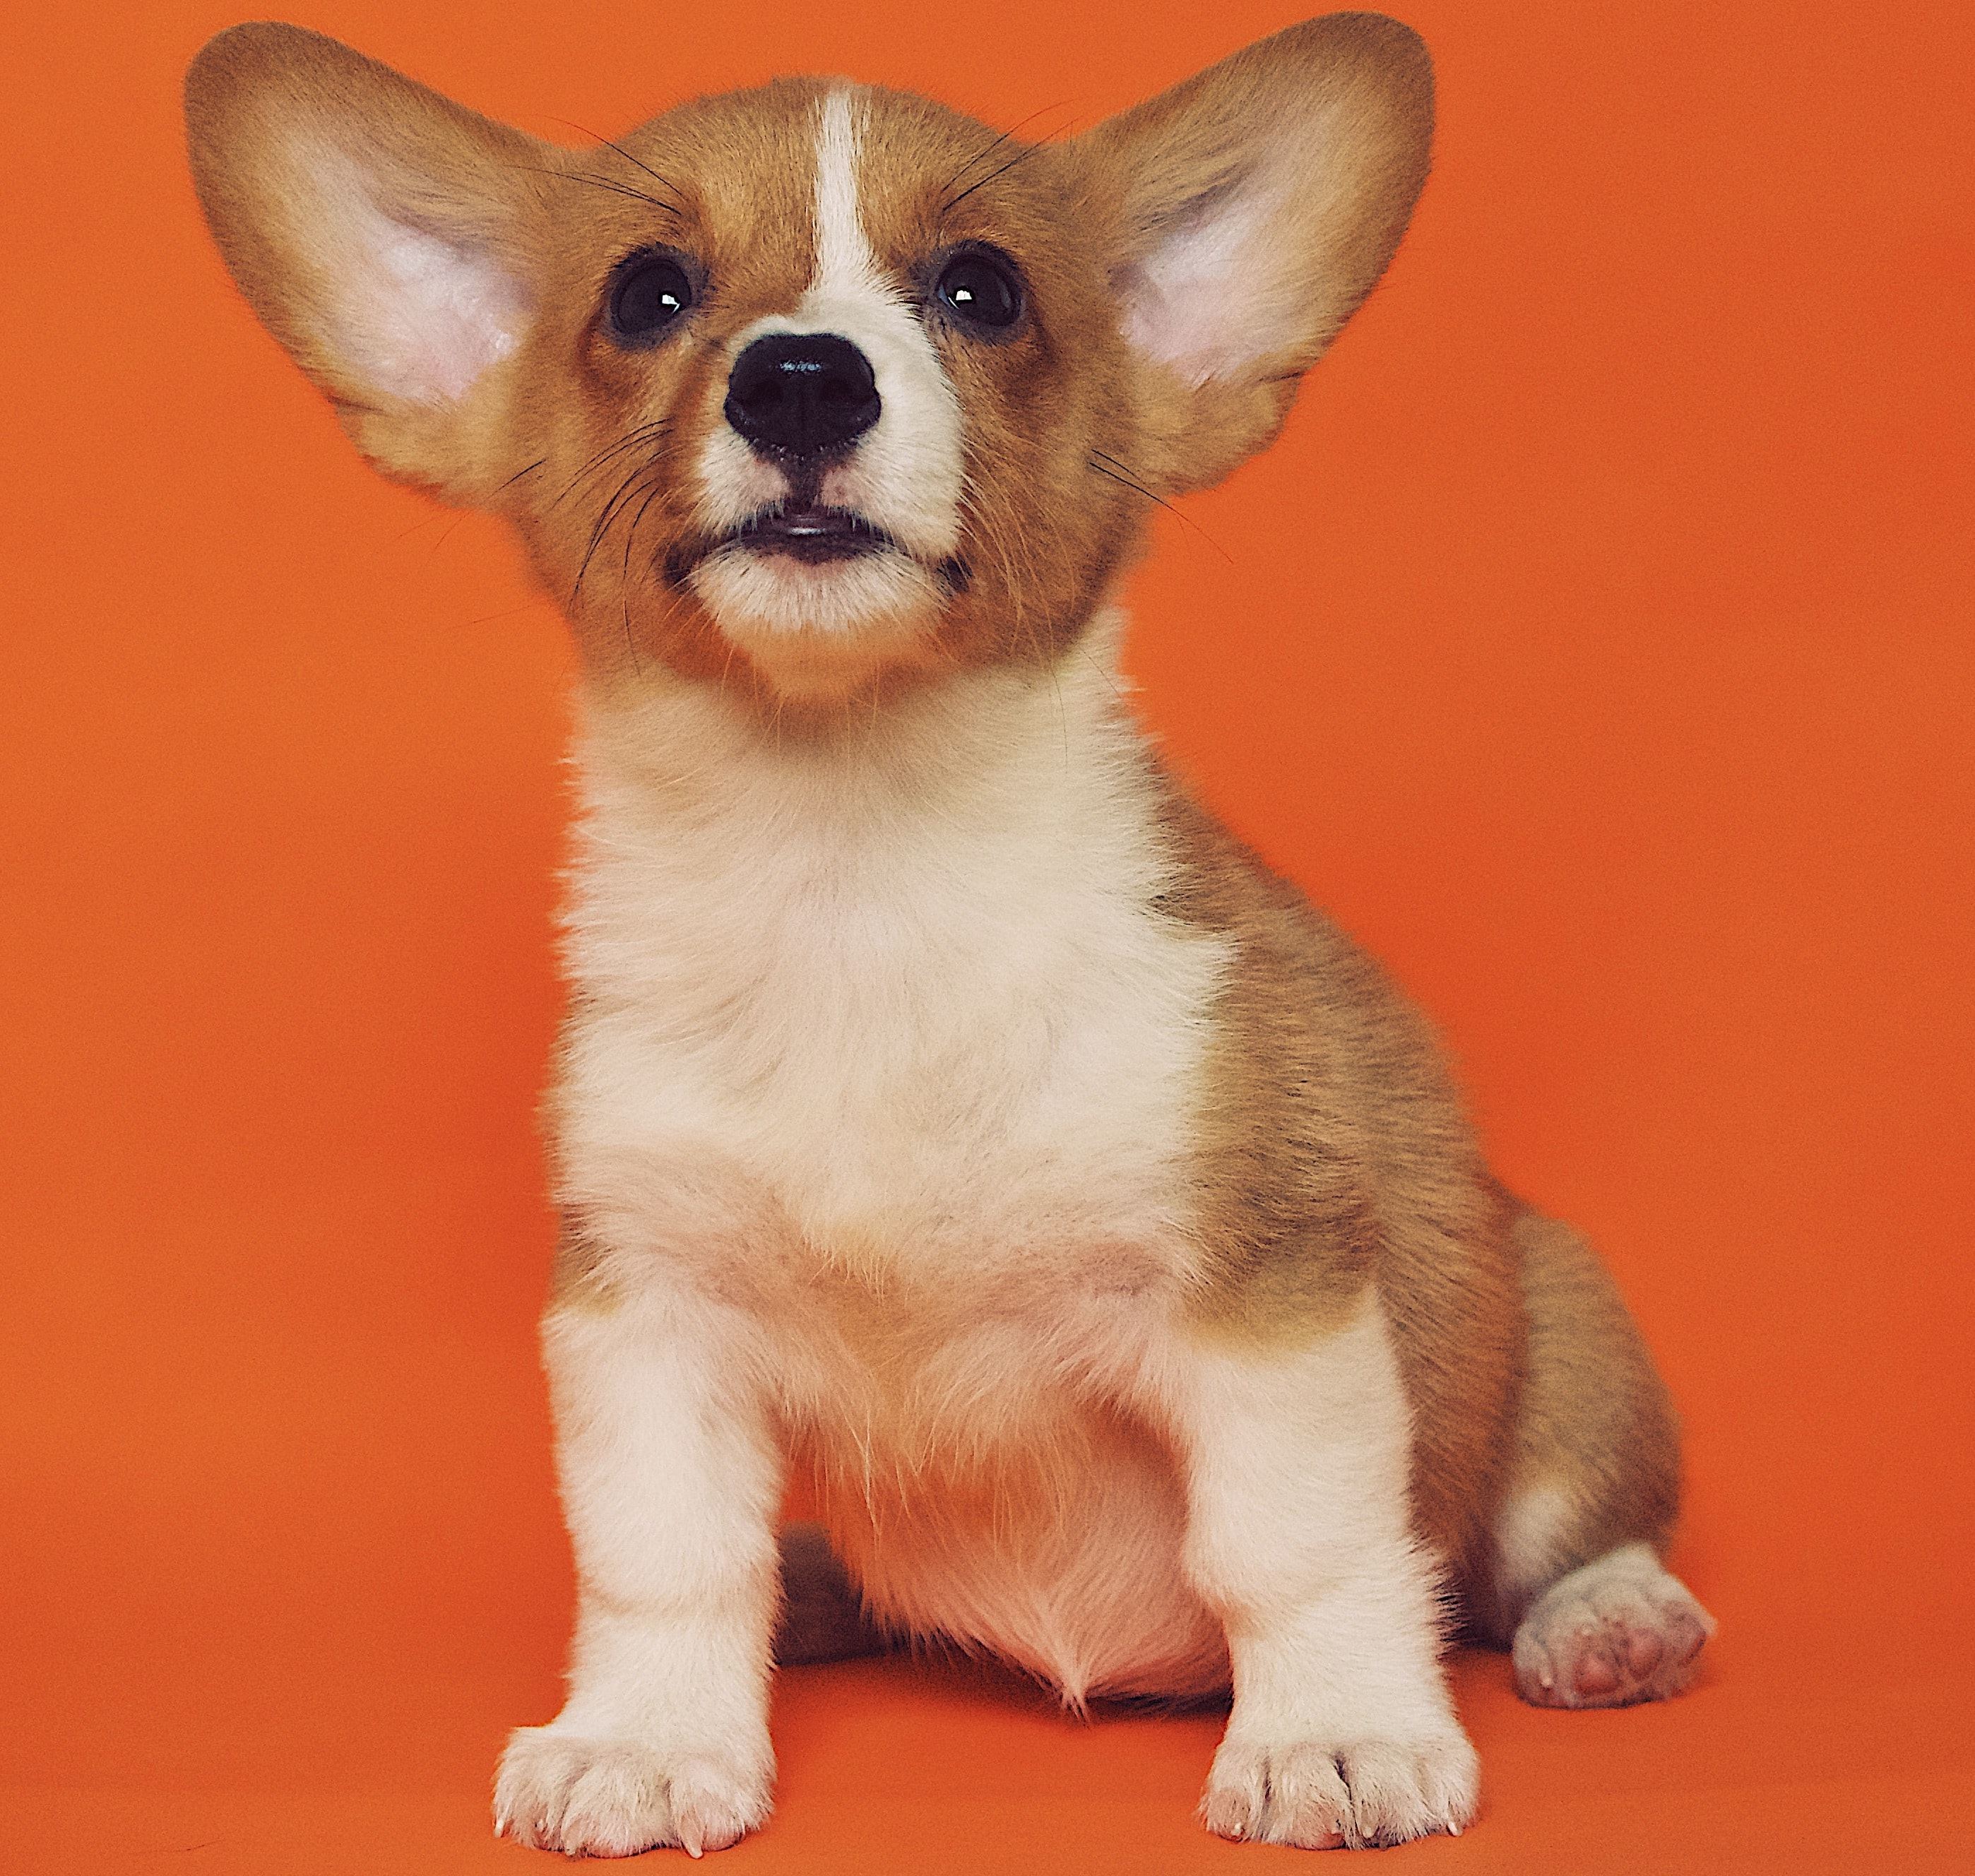

In [2]:
from IPython.display import Image
from pathlib import Path

image_path = next(Path(SUBJECT_IMAGES_DIR).iterdir())
Image(filename=image_path, width=500)

In [10]:
pretrained_model_name_or_path = "stabilityai/stable-diffusion-xl-base-1.0"
pretrained_vae_model_name_or_path = "madebyollin/sdxl-vae-fp16-fix"

In [7]:
# (Optional) Setup wandb to visualize generated samples during fine-tuning.
# !export WANDB_API_KEY="YOUR_WANDB_API_KEY"

# from train import launch_finetuning
from train_dreambooth_lora_sdxl import parse_args

args = [
    f"--pretrained_model_name_or_path={pretrained_model_name_or_path}",
    f"--pretrained_vae_model_name_or_path={pretrained_vae_model_name_or_path}",
    f"--instance_data_dir={SUBJECT_IMAGES_DIR}",
    "--output_dir=/mnt/local_storage/lora-trained-xl",
    "--mixed_precision=fp16",
    f"--instance_prompt=a photo of {SUBJECT_TOKEN} {SUBJECT_CLASS}",
    "--resolution=1024",
    "--train_batch_size=1",
    "--gradient_accumulation_steps=1",
    "--learning_rate=1e-4",
    "--lr_scheduler=constant",
    "--lr_warmup_steps=0",
    "--max_train_steps=1",
    "--checkpointing_steps=1",
    f"--validation_prompt=A photo of {SUBJECT_TOKEN} {SUBJECT_CLASS} in a bucket",
    "--validation_epochs=25",
    "--seed=0",
] + (["--report_to=wandb"] if os.environ.get("WANDB_API_KEY") else [])

# !python train.py \
#     --pretrained_model_name_or_path="stabilityai/stable-diffusion-xl-base-1.0" \
#     --pretrained_vae_model_name_or_path="madebyollin/sdxl-vae-fp16-fix" \
#     {report_to}
#     --instance_data_dir={SUBJECT_IMAGES_DIR} \
#     --output_dir="/mnt/local_storage/lora-trained-xl" \
#     --mixed_precision="fp16" \
#     --instance_prompt="a photo of {SUBJECT_TOKEN} {SUBJECT_CLASS}" \
#     --resolution=1024 \
#     --train_batch_size=1 \
#     --gradient_accumulation_steps=1 \
#     --learning_rate=1e-4 \
#     --lr_scheduler="constant" \
#     --lr_warmup_steps=0 \
#     --max_train_steps=1 \
#     --checkpointing_steps=1 \
#     --validation_prompt="A photo of {SUBJECT_TOKEN} {SUBJECT_CLASS} in a bucket" \
#     --validation_epochs=25 \
#     --seed="0"

(TrainTrainable pid=3126, ip=10.0.2.74) 2024-03-19 18:14:32.529730: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
(TrainTrainable pid=3126, ip=10.0.2.74) 2024-03-19 18:14:32.530083: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
(TrainTrainable pid=3126, ip=10.0.2.74) 2024-03-19 18:14:32.530091: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

(RayTrainWorker pid=3220, ip=10.0.2.74) [2024-03-19 18:16:21,710] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)


(RayTrainWorker pid=3220, ip=10.0.2.74) Model weights saved in /mnt/local_storage/lora-trained-xl/checkpoint-1/pytorch_lora_weights.safetensors
(RayTrainWorker pid=3220, ip=10.0.2.74) 03/19/2024 18:16:27 - INFO - accelerate.checkpointing - Optimizer state saved in /mnt/local_storage/lora-trained-xl/checkpoint-1/optimizer.bin
(RayTrainWorker pid=3220, ip=10.0.2.74) 03/19/2024 18:16:27 - INFO - accelerate.checkpointing - Scheduler state saved in /mnt/local_storage/lora-trained-xl/checkpoint-1/scheduler.bin
(RayTrainWorker pid=3220, ip=10.0.2.74) 03/19/2024 18:16:27 - INFO - accelerate.checkpointing - Sampler state for dataloader 0 saved in /mnt/local_storage/lora-trained-xl/checkpoint-1/sampler.bin
(RayTrainWorker pid=3220, ip=10.0.2.74) 03/19/2024 18:16:27 - INFO - accelerate.checkpointing - Gradient scaler state saved in /mnt/local_storage/lora-trained-xl/checkpoint-1/scaler.pt
(RayTrainWorker pid=3220, ip=10.0.2.74) 03/19/2024 18:16:27 - INFO - accelerate.checkpointing - Random states

Result(
  metrics={},
  path='anyscale-staging-data-shared-resources/org_rk3rp9vj3ymmzeievkm7vzhu4p/cld_q2nws7d324dw7rz4n74tgwhe9p/artifact_storage/training_results/stable-diffusion-finetuning/TorchTrainer_2fa87_00000_0_2024-03-19_18-14-23',
  filesystem='s3',
  checkpoint=Checkpoint(filesystem=s3, path=anyscale-staging-data-shared-resources/org_rk3rp9vj3ymmzeievkm7vzhu4p/cld_q2nws7d324dw7rz4n74tgwhe9p/artifact_storage/training_results/stable-diffusion-finetuning/TorchTrainer_2fa87_00000_0_2024-03-19_18-14-23/checkpoint_000000)
)


In [ ]:
import os

import ray.train
from ray.train.torch import TorchTrainer

from train_dreambooth_lora_sdxl import main, parse_args


def train_fn_per_worker(config: dict):
    args = config["args"]

    # See `train_dreambooth_lora_sdxl` for all of the actual training details.
    main(args)

    def get_latest_checkpoint_dir():
        dirs = os.listdir(args.output_dir)
        dirs = [d for d in dirs if d.startswith("checkpoint")]
        dirs = sorted(dirs, key=lambda x: int(x.split("-")[1]))
        path = dirs[-1] if len(dirs) > 0 else None
        return os.path.join(args.output_dir, path)

    checkpoint_dir = get_latest_checkpoint_dir()
    if checkpoint_dir is not None:
        ray.train.report(
            {},
            checkpoint=ray.train.Checkpoint.from_directory(checkpoint_dir),
        )


def launch_finetuning(input_args) -> ray.train.Result:
    args = parse_args(input_args=input_args)

    trainer = TorchTrainer(
        train_fn_per_worker,
        # Pass arguments from the driver to the `config` dict of the `train_fn_per_worker`
        train_loop_config={"args": args},
        scaling_config=ray.train.ScalingConfig(
            num_workers=1,
            use_gpu=True,
            accelerator_type="A10G",
        ),
        run_config=ray.train.RunConfig(
            storage_path=os.environ["ANYSCALE_ARTIFACT_STORAGE"] + "/training_results",
            name="stable-diffusion-finetuning",
        )
    )
    result = trainer.fit()
    return result

In [ ]:
result = launch_finetuning(input_args=args)

## Step 3: Generate some images with your fine-tuned model!

In [11]:
import ray.train

checkpoint = result.checkpoint

In [17]:
import ray
import uuid

@ray.remote(num_gpus=1, accelerator_type="A10G")
def inference(checkpoint):
    import torch
    from diffusers import AutoencoderKL, StableDiffusionXLPipeline

    with checkpoint.as_directory() as checkpoint_dir:
        vae = AutoencoderKL.from_pretrained(
            pretrained_vae_model_name_or_path,
            # subfolder="vae",
            # revision=args.revision,
            # variant=args.variant,
            torch_dtype=torch.float16,
        )
        pipeline = StableDiffusionXLPipeline.from_pretrained(
            pretrained_model_name_or_path,
            vae=vae,
            # revision=args.revision,
            # variant=args.variant,
            torch_dtype=torch.float16,
        )

        # load attention processors
        pipeline.load_lora_weights(checkpoint_dir)

    pipeline = pipeline.to("cuda")
    images = pipeline(prompt=["sks dog at the beach"]).images
    for image in images:
        image_filename = f"/mnt/cluster_storage/generated/{uuid.uuid4()}.jpg"
        print(image_filename)
        image.save(image_filename)


ray.get(inference.remote(checkpoint))

(inference pid=8608, ip=10.0.2.74) 2024-03-19 18:37:00.951011: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
(inference pid=8608, ip=10.0.2.74) 2024-03-19 18:37:00.951106: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
(inference pid=8608, ip=10.0.2.74) 2024-03-19 18:37:00.951113: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
100%|█

(inference pid=8608, ip=10.0.2.74) /mnt/cluster_storage/generated/a061630a-37b2-4b18-af61-49a702ea781f.jpg
